In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [2]:
# Load the existing dataset
df = None
try:
     df=pd.read_csv('fraud_detection_rwandan_bank_case_study.csv')
except FileNotFoundError:
    print("Error: File not found.")
except pd.errors.EmptyDataError:
    print("Error: The file is empty.")
except pd.errors.ParserError:
    print("Error: There was a problem parsing the file.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    

In [3]:
df.head()

,amount,location,device,time,first_withdraw_transactions_login_trials,client_average_withdraw_transactions_per_day,actual_number_of_withdraw_transaction,fraud
0,1288,Nyabihu,Mobile,Night,1,1,0,Legitimate
1,7747,Kamonyi,Computer,Night,1,0,0,Legitimate
2,5500,Rulindo,Mobile,Day,3,5,4,Legitimate
3,9146,Huye,Computer,Day,4,1,0,Fraudulent
4,2831,Gicumbi,Computer,Night,0,0,9,Fraudulent


In [4]:
df.drop(["amount","location"], axis=1, inplace=True)

In [5]:
# Encode 'fraud and time' variables
df['fraud'] = df['fraud'].map({'Legitimate': 0, 'Fraudulent': 1})
df['time'] = df['time'].map({'Night': 0, 'Day': 1})

# Initialize LabelEncoder
label_encoder = LabelEncoder()
df['device'] = label_encoder.fit_transform(df['device'])

In [6]:
df['device'].value_counts()

device
2    131
1    106
0     63
Name: count, dtype: int64

Accuracy: 1.0
Precision: 1.0
Recall (Sensitivity): 1.0
F1-Score: 1.0
Specificity (True Negative Rate): 1.0
Confusion Matrix:
 [[18  0]
 [ 0 42]]


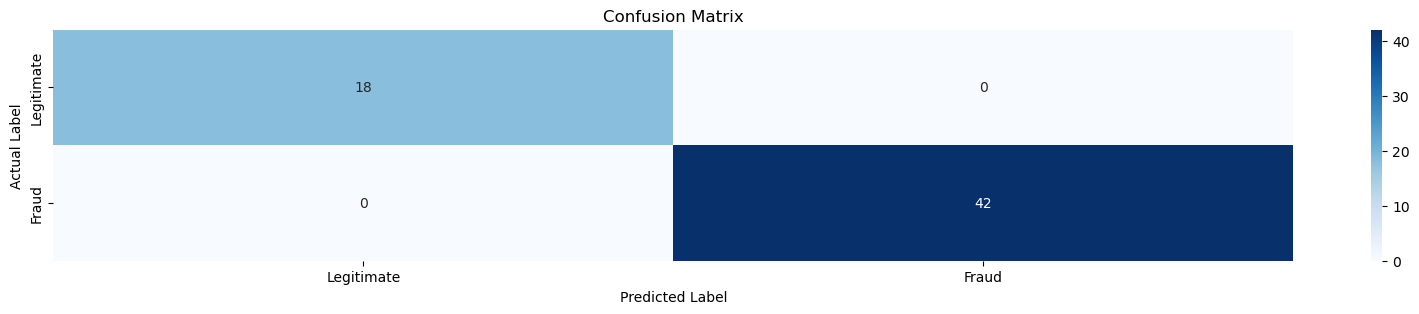

In [7]:

# Splitting features and labels
X = df.drop(columns=["fraud"])
y = df["fraud"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Random Forest model
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

#Evaluate the model using Accuracy, Precision and Confusion Matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall (Sensitivity):", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
# Extracting TN, FP, FN, TP for Specificity Calculation
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
# Calculating Specificity
print("Specificity (True Negative Rate):", TN / (TN + FP))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot Confusion Matrix
plt.figure(figsize=(20, 3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Fraud'], yticklabels=['Legitimate', 'Fraud'])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [8]:
# New data for prediction
new_data = pd.DataFrame({
    "device": [1, 0,2],
    "time": [1, 0, 0],
    "first_withdraw_transactions_login_trials":[5,2,3],
    "client_average_withdraw_transactions_per_day":[2,2,3],
    "actual_number_of_withdraw_transaction":[1,1,3]
})

# Predicting with new data
new_predictions = model.predict(new_data)

# Output the predictions
print("Predictions for new data:", new_predictions)

Predictions for new data: [1 0 0]
